<a href="https://colab.research.google.com/github/TanmayTopkhanewale/Comparative-Analysis-of-European-Option-Pricing-using-Binomial-Trees-and-Black-Scholes-Model/blob/main/European_Option_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import scipy
from math import sqrt, log, pow, erf, e
from datetime import datetime

#  European Option Pricing: Black-Scholes vs. Binomial Tree

## Objective
This project aims to implement and compare two fundamental models for pricing European-style vanilla options:
- **Black-Scholes Model**
- **Binomial Tree Model**

We assess their assumptions, convergence behavior, sensitivity to key parameters, and performance against real market data (JPM stock).

---

## 1.  Implemented Models

### 1.1 Black-Scholes Model
- Closed-form analytical solution.
- Used for pricing European options under the assumption of log-normal asset returns and constant volatility.

**Implemented Features:**
- European Call and Put pricing
- Greeks calculation (optional)

### Mathematical Formulation

#### **Call Option Price**:

$$
C = S_0 N(d_1) - K e^{-rT} N(d_2)
$$

#### **Put Option Price**:

$$
P = K e^{-rT} N(-d_2) - S_0 N(-d_1)
$$

Where:

$$
d_1 = \frac{\ln\left(\frac{S_0}{K}\right) + \left(r + \frac{\sigma^2}{2}\right) T}{\sigma \sqrt{T}}, \quad
d_2 = d_1 - \sigma \sqrt{T}
$$
---

### Parameters

- **$S_0$**: Current price of the underlying asset  
- **K**: Strike price  
- **r**: Risk-free interest rate  
- **T**: Time to expiration (in years)  
- **$\sigma$**: Volatility of the underlying asset  
- **$N(\cdot)$**: Cumulative distribution function (CDF) of the standard normal distribution  

### Use Case

- Best suited for **European-style options**.
- Efficient and fast pricing when assumptions are met.
- Commonly used in financial markets due to its simplicity and closed-form nature.

---

## Option Greeks

Option Greeks measure the sensitivity of the option price to various factors like price, time, volatility, and interest rate. Here's a summary:

---

### 1. Delta \$( \Delta \)$

Measures the rate of change of the option price with respect to changes in the underlying asset's price.

- **Call Option**:  
  $$
  \Delta = N(d_1)
  $$

- **Put Option**:  
  $$
  \Delta = N(d_1) - 1
  $$

---

### 2. Gamma \$( \Gamma \)$

Measures the rate of change of Delta with respect to changes in the underlying asset's price.

$$
\Gamma = \frac{N'(d_1)}{S_0 \cdot \sigma \cdot \sqrt{T}}
$$

---

### 3. Vega \$( V \)$

Measures sensitivity of the option price to changes in volatility.

$$
V = S_0 \cdot N'(d_1) \cdot \sqrt{T}
$$

---

### 4. Theta \$( \Theta \)$

Measures the rate of change of the option price with respect to time (i.e., time decay).

- **Call Option**:
  $$
  \Theta = -\frac{S_0 \cdot N'(d_1) \cdot \sigma}{2 \sqrt{T}} - rK e^{-rT} N(d_2)
  $$

- **Put Option**:
  $$
  \Theta = -\frac{S_0 \cdot N'(d_1) \cdot \sigma}{2 \sqrt{T}} + rK e^{-rT} N(-d_2)
  $$

---

### 5. Rho \$( \rho \)$

Measures sensitivity of the option price to changes in the risk-free interest rate.

- **Call Option**:
  $$
  \rho = K T e^{-rT} N(d_2)
  $$

- **Put Option**:
  $$
  \rho = -K T e^{-rT} N(-d_2)
  $$

---

**Note**:  
- **$ N(d)$**: Cumulative distribution function of the standard normal distribution  
- **$N'(d)$**: Probability density function (i.e., standard normal PDF)


In [ ]:
import numpy as np
from scipy.stats import norm
#S, K, T, r, sigma, type="call"
class black_scholes():
    def __init__(self,S,K,r,sigma,T):
        self.S=S
        self.K=K
        self.r=r
        self.sigma=sigma
        self.T=T
    def d1(self):
        return(np.log(self.S / self.K) + (self.r + 0.5 * self.sigma**2) * self.T) / (self.sigma * np.sqrt(self.T))
    def d2(self):
        return(self.d1() - self.sigma * np.sqrt(self.T))
    def call_option_price(self):
        return(self.S * norm.cdf(self.d1()) - self.K * np.exp(-self.r * self.T) * norm.cdf(self.d2()))
    def put_option_price(self):
        return(self.K * np.exp(-self.r * self.T) * norm.cdf(-self.d2()) - self.S * norm.cdf(-self.d1()))
class black_scholesgreeks(black_scholes):
    def delta_call(self):
       return(norm.cdf(self.d1()))
    def delta_put(self):
       return(norm.cdf(self.d1()) - 1)
    def Gamma(self):
        return(norm.pdf(self.d1()) / (self.S * self.sigma * np.sqrt(self.T)))
    def Vega(self):
       return(self.S * norm.pdf(self.d1()) * np.sqrt(self.T))
    def Theta_call(self):
       return((-self.S * norm.pdf(self.d1()) * self.sigma) / (2 * np.sqrt(self.T))-(self.r * self.K * np.exp(-self.r * self.T) * norm.cdf(self.d2())))
    def Theta_put(self):
        return((-self.S * norm.pdf(self.d1()) * self.sigma) / (2 * np.sqrt(self.T))-(self.r * self.K * np.exp(-self.r * self.T) * norm.cdf(-self.d2())))
    def Rho_call(self):
        return (self.K * self.T * np.exp(-self.r * self.T) * (norm.cdf(d2)))
    def Rho_put(self):
        return (self.K * self.T * np.exp(-self.r * self.T) * (-norm.cdf(-d2)))


In [ ]:
#we use standard parameter values here
bsm = black_scholes(S=100, K=100, T=1, r=0.05, sigma=0.2)
print(f"Call Option Price: {bsm.call_option_price()}")
print(f"Put Option Price: {bsm.put_option_price()}")
bsg=black_scholesgreeks(S=100,K=100,T=1,r=0.05,sigma=0.2)
print(f"Call Delta: {bsg.delta_call()}")
print(f"Put Delta: {bsg.delta_put()}")

Call Option Price: 10.450583572185565
Put Option Price: 5.573526022256971
Call Delta: 0.6368306511756191
Put Delta: -0.3631693488243809


### 1.2 Binomial Tree Model
- Discrete-time numerical model that approximates option value via backward induction.
- More flexible for incorporating features like early exercise (used for American options).

**Implemented Features:**
- Recombining Binomial Tree
- Adjustable number of steps `N`
- European Call and Put support

#### **Step-by-Step Calculation**

1. **Time Step**:  
   $$\Delta t = \frac{T}{N}$$

2. **Up and Down Factors**:  
   $$u = e^{\sigma \sqrt{\Delta t}}$$  
   $$d = e^{-\sigma \sqrt{\Delta t}}$$

3. **Risk-Neutral Probability**:  
   $$q = \frac{e^{r \Delta t} - d}{u - d}$$

4. **Terminal Payoff**:  
   At each node at maturity, calculate option value:  
   - Call: $$C_T = \max(S_T - K, 0)$$  
   - Put: $$P_T = \max(K - S_T, 0)$$

5. **Backward Induction**:  
   $$f_t = e^{-r \Delta t} \left(q \cdot f_{t+1}^{\text{up}} + (1 - q) \cdot f_{t+1}^{\text{down}}\right)$$

---

#### **Use Cases**

- Pricing **European** and **American** options.  
- Can handle dividends and variable volatility.  
- Useful for **real options** and exotic derivatives.

---

In [ ]:
def binomial_tree(S, K, T, r, sigma, N=100, option_type="call"):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    discount = np.exp(-r * dt)

    # Initialize asset prices at maturity
    asset_prices = np.array([S * (u ** j) * (d ** (N - j)) for j in range(N + 1)])

    # Option values at maturity
    if option_type == "call":
        option_values = np.maximum(asset_prices - K, 0)
    elif option_type == "put":
        option_values = np.maximum(K - asset_prices, 0)
    else:
        raise ValueError("option_type must be 'call' or 'put'")

    # Backward induction
    for i in reversed(range(N)):
        option_values = discount * (p * option_values[1:i+2] + (1 - p) * option_values[0:i+1])
    return option_values[0]


In [ ]:
price_call = binomial_tree(S=100, K=100, T=1, r=0.05, sigma=0.2, N=100, option_type="call")
print("Binomial Call Price:", price_call)
price_put = binomial_tree(S=100, K=100, T=1, r=0.05, sigma=0.2, N=100, option_type="put")
print("Binomial Call Price:", price_put)

Binomial Call Price: 10.430611662249113
Binomial Call Price: 5.553554112321353


In [ ]:
price = binomial_tree(S=100, K=100, T=1, r=0.05, sigma=0.2, N=100, option_type="call")
print("Binomial Call Price:", price)
price = binomial_tree(S=100, K=100, T=1, r=0.05, sigma=0.2, N=500, option_type="call")
print("Binomial Call Price:", price)
price = binomial_tree(S=100, K=100, T=1, r=0.05, sigma=0.2, N=1000, option_type="call")
print("Binomial Call Price:", price)
price = binomial_tree(S=100, K=100, T=1, r=0.05, sigma=0.2, N=5000, option_type="call")
print("Binomial Call Price:", price)
price = binomial_tree(S=100, K=100, T=1, r=0.05, sigma=0.2, N=10000, option_type="call")
print("Binomial Call Price:", price)
price = binomial_tree(S=100, K=100, T=1, r=0.05, sigma=0.2, N=50000, option_type="call")
print("Binomial Call Price:", price)
price = binomial_tree(S=100, K=100, T=1, r=0.05, sigma=0.2, N=100000, option_type="call")
print("Binomial Call Price:", price)

Binomial Call Price: 10.430611662249113
Binomial Call Price: 10.44658513644654
Binomial Call Price: 10.448584103764572
Binomial Call Price: 10.450183638471676
Binomial Call Price: 10.450383602854469
Binomial Call Price: 10.45054357780628
Binomial Call Price: 10.450563575596888


Here we are seeing that by manually increasing the steps size, the binomial tree and black scholes option prices are converging for both the option types

In [ ]:
price = binomial_tree(S=100, K=100, T=1, r=0.05, sigma=0.2, N=100, option_type="put")
print("Binomial Call Price:", price)
price = binomial_tree(S=100, K=100, T=1, r=0.05, sigma=0.2, N=500, option_type="put")
print("Binomial Call Price:", price)
price = binomial_tree(S=100, K=100, T=1, r=0.05, sigma=0.2, N=1000, option_type="put")
print("Binomial Call Price:", price)
price = binomial_tree(S=100, K=100, T=1, r=0.05, sigma=0.2, N=5000, option_type="put")
print("Binomial Call Price:", price)
price = binomial_tree(S=100, K=100, T=1, r=0.05, sigma=0.2, N=10000, option_type="put")
print("Binomial Call Price:", price)
price = binomial_tree(S=100, K=100, T=1, r=0.05, sigma=0.2, N=50000, option_type="put")
print("Binomial Call Price:", price)
price = binomial_tree(S=100, K=100, T=1, r=0.05, sigma=0.2, N=100000, option_type="put")
print("Binomial Call Price:", price)

Binomial Call Price: 5.553554112321353
Binomial Call Price: 5.5695275865157745
Binomial Call Price: 5.57152655383368
Binomial Call Price: 5.573126088591665
Binomial Call Price: 5.57332605291331
Binomial Call Price: 5.57348602806344
Binomial Call Price: 5.573506024832908


## 2.  Mathematical Assumptions Comparison

| Feature                | Black-Scholes                          | Binomial Tree                       |
|------------------------|----------------------------------------|-------------------------------------|
| Time                  | Continuous                              | Discrete                            |
| Price Evolution       | Geometric Brownian Motion               | Step-wise up/down movement          |
| Volatility            | Constant                                | Constant                            |
| Interest Rate         | Constant                                | Constant                            |
| Dividends             | Not included (can be added)             | Can be included                     |
| Flexibility           | Low (European only)                     | Higher (can be extended to American)|

 **Insight:** While Black-Scholes is fast and elegant, the Binomial Tree is more versatile for real-world use cases if properly tuned.

---

## 3.  Convergence of Binomial to Black-Scholes

We evaluated the option price from the Binomial Tree as the number of steps `N` increases and compared it to the Black-Scholes price.


Text(0, 0.5, 'Call Option Price')

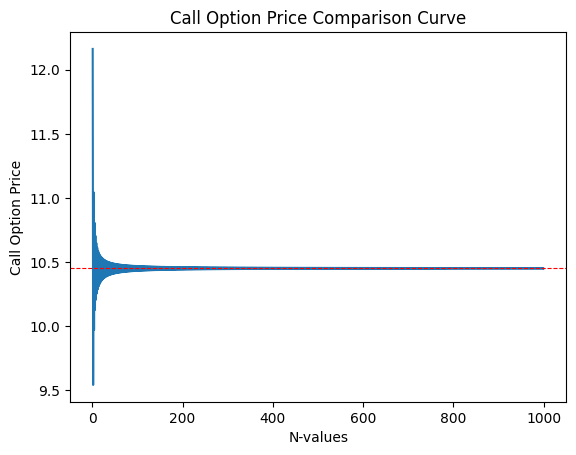

In [ ]:
N=1001
x_call=np.array([])
for k in range(1,N):
    x_call=np.append(x_call,(binomial_tree(S=100, K=100, T=1, r=0.05, sigma=0.2,N=k, option_type="call")))
N=np.arange(1,N)
plt.plot(N,x_call)
plt.axhline(y=bsm.call_option_price(), color='r', linestyle='--',linewidth=0.8,label="BS Call Option Price")
plt.title("Call Option Price Comparison Curve")
plt.xlabel("N-values")
plt.ylabel("Call Option Price")

Text(0, 0.5, 'Put Option Price')

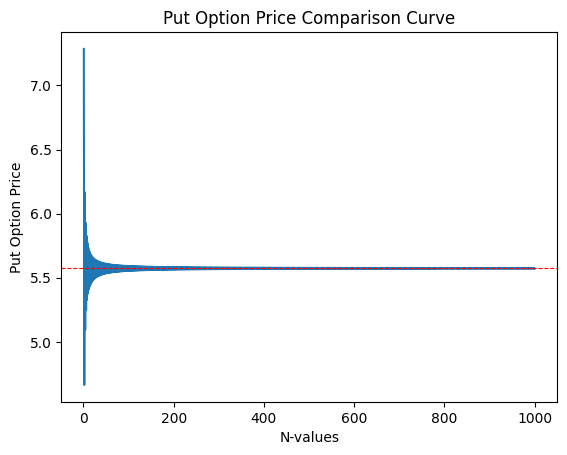

In [ ]:
N=1001
x_put=np.array([])
for k in range(1,N):
    x_put=np.append(x_put,(binomial_tree(S=100, K=100, T=1, r=0.05, sigma=0.2,N=k, option_type="put")))
N=np.arange(1,N)
plt.plot(N,x_put)
plt.axhline(y=bsm.put_option_price(), color='r', linestyle='--',linewidth=0.8,label="BS Price")
plt.title("Put Option Price Comparison Curve")
plt.xlabel("N-values")
plt.ylabel("Put Option Price")

 **Insight:** As `N` increases (typically `N > 500`), the Binomial Tree price converges to the Black-Scholes price for European options, validating the theoretical consistency between the models.
 In the above graph we have done the price comparison for both the Black Scholes and Binomial Tree Model.We see that as number of time steps increases and tends to infinity or a larger value of N, option price set by BS and BT converges and becomes equal to one another.

In [ ]:
#In the above graph we have done the price comparison for both the Black Scholes and Binomial Tree Model.
#We see that as number of time steps increases and tends to infinity or a larger value of N, option price set by BS and BT converges
#and becomes equal to one another.

##  Convergence Analysis of Binomial Tree to Black-Scholes

###  Objective
To investigate how the Binomial Tree model's output approaches the Black-Scholes model price as the number of time steps \( N \) increases, for both **European call** and **put** options.

---

###  Convergence Plot: Call Option

####  Observations:
- The **absolute difference** between the Binomial Tree price and the Black-Scholes call price **decreases** steadily as \( N \) increases.
- Both **semilog** and **log-log** plots exhibit the **convergence trend** clearly.
- The log-log plot shows an approximately **linear decay**, indicating **power-law convergence**.


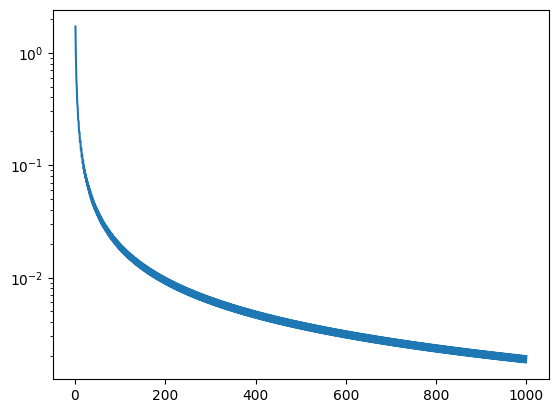

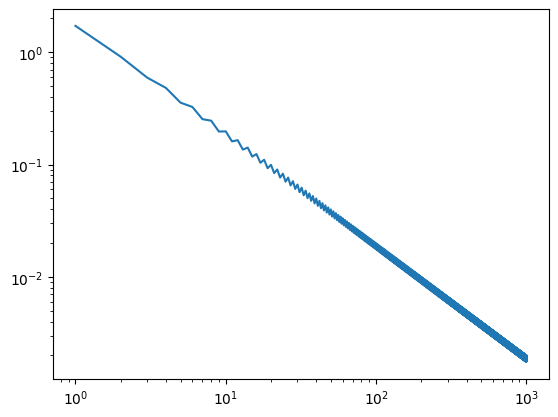

In [ ]:
Abs_diff_call=np.array([])
for i in range(len(x_call)):
    Abs_diff_call=np.append(Abs_diff_call, abs(bsm.call_option_price()-x_call[i]))
plt.show(plt.semilogy(N,Abs_diff_call))
plt.show(plt.loglog(N,Abs_diff_call))

In [ ]:
from scipy.stats import linregress
log_N = np.log(N)
log_error = np.log(Abs_diff_call)

slope, intercept, r_value, p_value, std_err = linregress(log_N, log_error)
print(f"Estimated convergence rate (slope): {slope:.3f}")

Estimated convergence rate (slope): -0.999


#### Estimated Convergence Rate: -0.999
This indicates **first-order convergence**, which is expected for the binomial tree model.

---


### 📊 Convergence Plot: Put Option

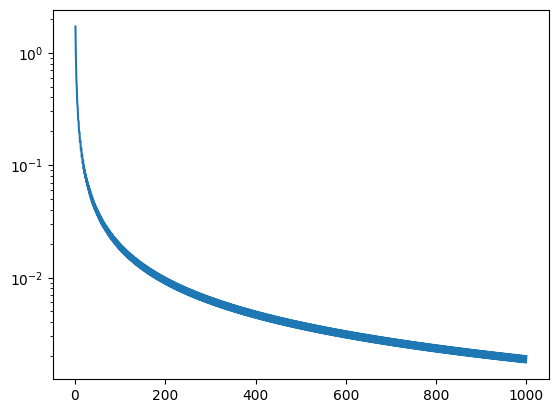

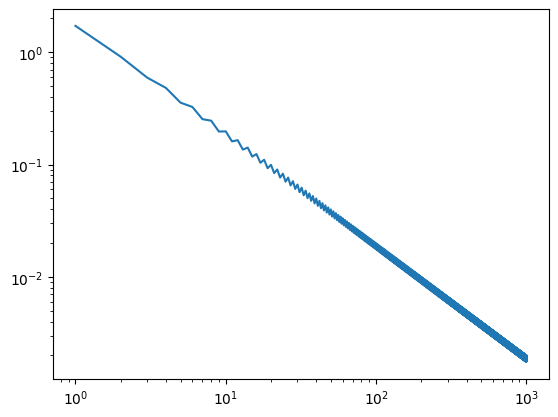

In [ ]:
Abs_diff_put=np.array([])
for i in range(len(x_put)):
    Abs_diff_put=np.append(Abs_diff_put, abs(bsm.put_option_price()-x_put[i]))
plt.show(plt.semilogy(N,Abs_diff_put))
plt.show(plt.loglog(N,Abs_diff_put))

In [ ]:
from scipy.stats import linregress
log_N = np.log(N)
log_error = np.log(Abs_diff_put)

slope, intercept, r_value, p_value, std_err = linregress(log_N, log_error)
print(f"Estimated convergence rate (slope): {slope:.3f}")

Estimated convergence rate (slope): -0.999


####  Observations:
- Similar to the call option, the **error in the put price** also **decays rapidly** as \( N \to 1000 \).
- Both plots again suggest **power-law convergence**, and the log-log plot has a clean, almost linear trend.

####  Estimated Convergence Rate:0.999
This confirms the Binomial Tree model accurately approximates the Black-Scholes price with a **convergence rate close to 1** for both option types.

---

###  Insight

>  These results validate that the **Binomial Tree model converges** to the Black-Scholes model with **increasing time steps**, making it a reliable numerical alternative when the closed-form solution is unavailable or hard to extend (e.g., for American options or dividends).

#Evaluating model Sensitivity to key parameters.

1)Volatility

2)Time to Maturity

3)Risk-Free Interest Rate

4)Strike Price

### 4.1 Volatility (σ)
- Black-Scholes: Option price increases non-linearly with volatility.
- Binomial Tree: Similar behavior, but may underperform with low steps `N`.

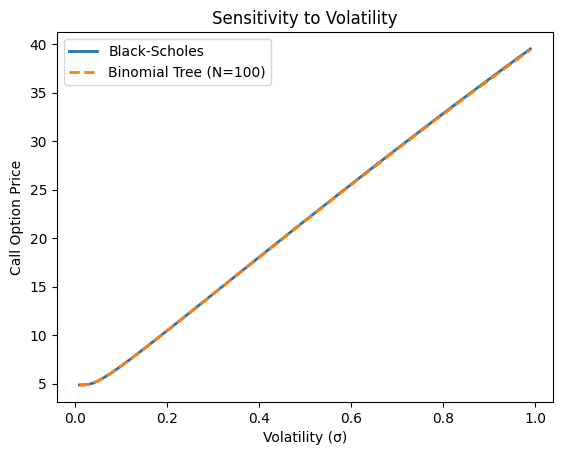

In [ ]:
#Here we use volatility for sensitivity testing.
S,K,T,r=100,100,1,0.05
N=100
sigmas = np.arange(0.01, 1.0, 0.01)
bs_prices = np.array([])
bt_prices = np.array([])

for sigma in sigmas:
    bs = black_scholes(S, K, r, sigma, T)
    bs_prices=np.append(bs_prices,bs.call_option_price())
    bt_prices=np.append(bt_prices,binomial_tree(S, K, T, r, sigma, N, option_type="call"))

plt.plot(sigmas, bs_prices, label='Black-Scholes', linewidth=2)
plt.plot(sigmas, bt_prices, '--', label='Binomial Tree (N=100)', linewidth=2)
plt.xlabel('Volatility (σ)')
plt.ylabel('Call Option Price')
plt.title('Sensitivity to Volatility')
plt.legend()
plt.show()

### 4.2 Time to Maturity (T)
- Option value generally increases with time.
- More time = higher probability of favorable movement.

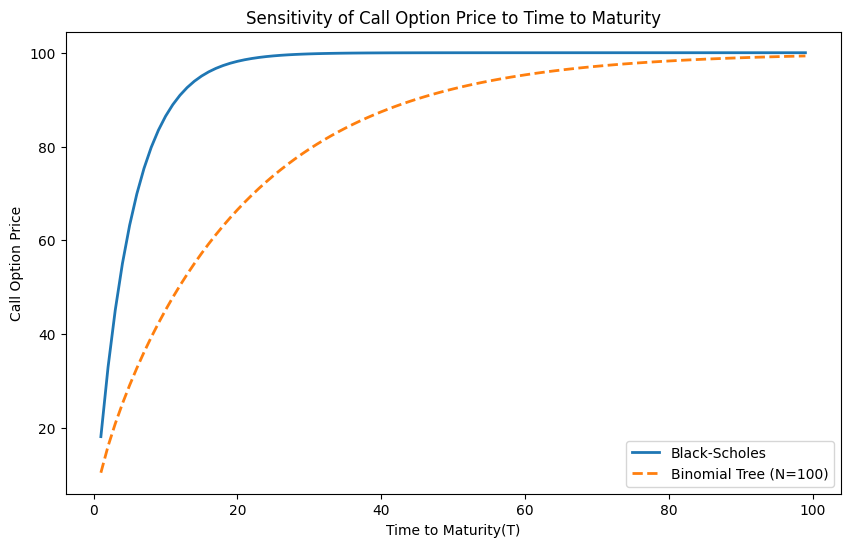

In [ ]:
S,K,r,N,sigma=100,100,0.05,100,0.2
BS_c=[]
BT_c=[]
Time=np.arange(1,100,1)
for T in Time:
    bs= black_scholes(S, K, T, r, sigma)
    BS_c.append(bs.call_option_price())
    bt_price = binomial_tree(S, K, T, r, sigma,N, option_type="call")
    BT_c.append(bt_price)
plt.figure(figsize=(10, 6))
plt.plot(Time, BS_c, label='Black-Scholes', linewidth=2)
plt.plot(Time, BT_c, label='Binomial Tree (N=100)', linestyle='--', linewidth=2)
plt.xlabel('Time to Maturity(T)')
plt.ylabel('Call Option Price')
plt.title('Sensitivity of Call Option Price to Time to Maturity')
plt.legend()
plt.show()

### 4.3 Risk-Free Rate (r)
- Call options: price increases with higher `r`.
- Put options: price decreases with higher `r`.


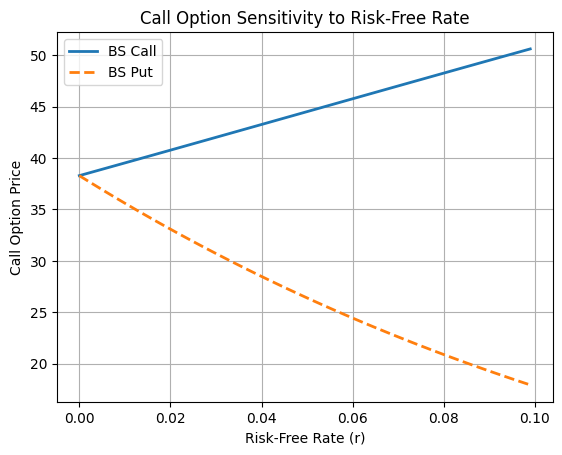

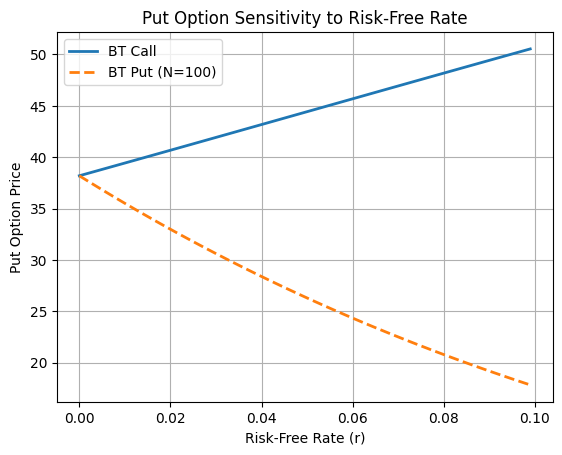

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
S,K,T,sigma,N=100,100,4,0.5,100
# risk-free rates
rates = np.arange(0.0, 0.1, 0.001)

bs_calls, bs_puts = [], []
bt_calls, bt_puts = [], []

# Loop over risk-free rates
for r in rates:
    bs = black_scholes(S, K, r, sigma, T)
    bs_calls.append(bs.call_option_price())
    bs_puts.append(bs.put_option_price())

    bt_calls.append(binomial_tree(S, K, T, r, sigma, N, option_type="call"))
    bt_puts.append(binomial_tree(S, K, T, r, sigma, N, option_type="put"))

# Plot Call Options
plt.plot(rates, bs_calls, label="BS Call", linewidth=2)
plt.plot(rates, bs_puts, '--', label="BS Put", linewidth=2)
plt.xlabel('Risk-Free Rate (r)')
plt.ylabel('Call Option Price')
plt.title('Call Option Sensitivity to Risk-Free Rate')
plt.grid(True)
plt.legend()
plt.show()

# Plot Put Options
plt.plot(rates, bt_calls, label="BT Call", linewidth=2)
plt.plot(rates, bt_puts, '--', label="BT Put (N=100)", linewidth=2)
plt.xlabel('Risk-Free Rate (r)')
plt.ylabel('Put Option Price')
plt.title('Put Option Sensitivity to Risk-Free Rate')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
#Call option price increases with r: Present value of strike 𝐾*exp(-rT)  gets smaller → option becomes more valuable.
#Put option price decreases with r: The guarantee of receiving K in the future becomes less valuable.

### 4.4 Strike Price (K)
- As strike increases, call prices drop and put prices rise.

 **Insight:** Black-Scholes and Binomial Tree both respond similarly to parameter changes. Differences appear more in edge cases (deep ITM/OTM or short maturity).

---

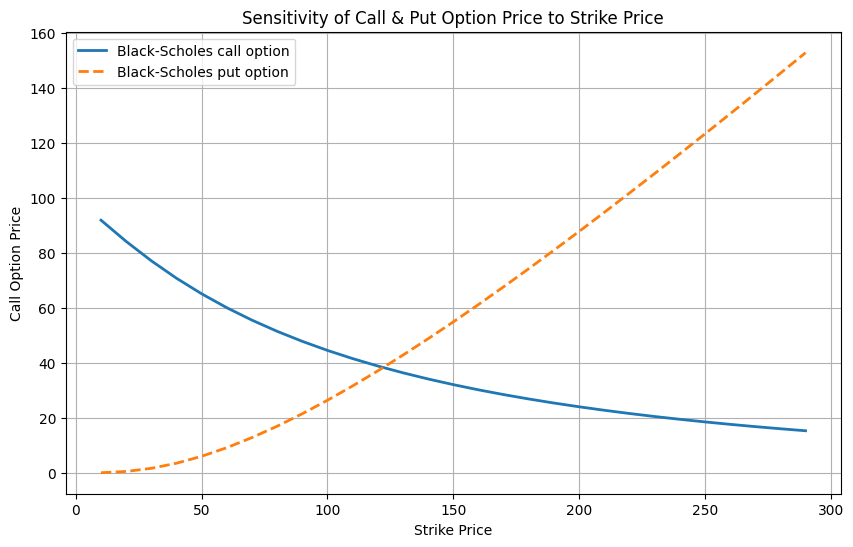

In [ ]:
# Now we use the risk free interest rate to measure the sensitivity of the price
S,T,sigma,N,r=100,4,0.5,100,0.05
BS_call=[]
BS_put=[]
str_price=np.arange(10,300,10)
for K in str_price:
    call_price= black_scholes(S,K,r,sigma,T)
    BS_call.append(call_price.call_option_price())
    put_price = black_scholes(S,K,r,sigma,T)
    BS_put.append(put_price.put_option_price())
plt.figure(figsize=(10, 6))
plt.plot(str_price, BS_call, label='Black-Scholes call option', linewidth=2)
plt.plot(str_price, BS_put, label='Black-Scholes put option', linestyle='--', linewidth=2)
plt.xlabel('Strike Price')
plt.ylabel('Call Option Price')
plt.title('Sensitivity of Call & Put Option Price to Strike Price')
plt.legend()
plt.grid(True)
plt.show()

Here we see that the Call option price decreases and Put option price increase with increase in strike price.
There also occurs a optimal condition where Call option price and put option price is equal

## 5. 📊 Real Market Data Comparison

### Source: [JPMorgan Chase & Co. (JPM)] Options using `yfinance`

- We selected options expiring on `2025-07-11`.
- Used current spot price `S`, historical volatility for σ, and 10-year treasury yield as `r`.

### 🧪 Model vs. Market Prices

📈 *[Insert Market vs Model Price chart]*

🧠 **Insight:**
- **Black-Scholes** performs well for ATM options with longer maturities.
- **Binomial Tree** diverges more in low-step implementations or short maturities, especially for far OTM options.
---

In [ ]:
ticker1 = yf.Ticker("JPM")
spot_price = ticker1.history(period="1d")['Close'].iloc[-1]
ticker2 = yf.Ticker("HPQ")
spot_price = ticker2.history(period="1d")['Close'].iloc[-1]
ticker3 = yf.Ticker("TSL")
spot_price = ticker3.history(period="1d")['Close'].iloc[-1]

In [ ]:
expiries = ticker1.options
date = expiries[3]
def fetch_options_data(ticker,date):
    options_dates = ticker.options
    # We'll use the nearest expiry date for our analysis
    options_data = ticker.option_chain(date)
    return options_data.calls, options_data.puts
calls,puts=fetch_options_data(ticker1,date)

In [ ]:
calls=pd.DataFrame(calls)
calls.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,JPM250711C00235000,2025-06-09 19:30:49+00:00,235.0,32.73,0.0,0.0,0.0,0.0,5.0,8,0.00001,True,REGULAR,USD
1,JPM250711C00245000,2025-06-13 18:40:42+00:00,245.0,21.30,0.0,0.0,0.0,0.0,NaN,3,0.00001,True,REGULAR,USD
2,JPM250711C00250000,2025-05-30 17:14:09+00:00,250.0,17.69,0.0,0.0,0.0,0.0,1.0,1,0.00001,True,REGULAR,USD
3,JPM250711C00255000,2025-06-12 19:44:12+00:00,255.0,15.05,0.0,0.0,0.0,0.0,2.0,11,0.00001,True,REGULAR,USD
4,JPM250711C00260000,2025-06-13 19:50:36+00:00,260.0,9.45,0.0,0.0,0.0,0.0,25.0,67,0.00001,True,REGULAR,USD


# Understanding the 10-Year U.S. Treasury Rate

---

## 🔹 What Is It?

The **10-Year U.S. Treasury Yield** represents the return on investment for the U.S. government's 10-year debt obligation. It is widely regarded as a **benchmark risk-free interest rate** for the U.S. economy and global financial markets.

---

## Why Is It Important?

- **Risk-Free Rate Proxy:**  
  The 10-year yield is commonly used as the **risk-free rate \( r \)** in financial models such as the **Black-Scholes** option pricing model.

- **Economic Indicator:**  
  It reflects investor confidence. Falling yields suggest increased demand for safe assets (pessimism about growth), while rising yields indicate confidence in economic expansion.

- **Impacts Asset Pricing:**  
  It influences:
  - Mortgage rates
  - Equity valuations (via DCF models)
  - Bond markets
  - Option pricing models

---

## Current Use in Option Pricing

In this project, we use the **10-Year Treasury Yield** as a proxy for the **risk-free interest rate \( r \)** in both:
- **Black-Scholes Model**
- **Binomial Tree Model**

> Example:
> If the current 10-year yield is **4.85%**, we use \( r = 0.0485 \) in our calculations.

---

##  Where to Find the 10-Year Rate?

- **[U.S. Department of the Treasury](https://home.treasury.gov)**
- **[FRED (Federal Reserve Economic Data)](https://fred.stlouisfed.org)**
- **[Yahoo Finance / Bloomberg / TradingView]**

Look for:
- **10-Year Constant Maturity Rate (GS10)**
- Updated daily (business days)

---

##  Limitations

- Not suitable for short-dated options (e.g., 1-week expiry)
- May diverge from market-implied risk-free rates (like SOFR or Eurodollar futures)

---

##  Note

If modeling short-term options or intraday instruments, consider using shorter-dated treasury yields (e.g., 1-Month T-Bills) or **Overnight Index Swap (OIS)** rates instead.

---


In [ ]:
def get_10yr_treasury_rate():
    # 10 year treasury ticker symbol
    treasury_ticker = "^TNX"
    now = datetime.now()
    ten_years_ago = now.replace(year=now.year - 10)
    treasury_data = yf.download(treasury_ticker, start=ten_years_ago, end=now)
    last_yield = treasury_data['Close'].iloc[-1]
    return last_yield
print(f"Riskfree rate: {get_10yr_treasury_rate()}")
r=get_10yr_treasury_rate()/100

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Riskfree rate: Ticker
^TNX    4.434
Name: 2025-06-16 00:00:00, dtype: float64


In [ ]:
def get_option_data(ticker, expiration_date=None):
    """Get option chain data from Yahoo Finance"""
    stock = yf.Ticker(ticker)

    if expiration_date is None:
        exp_dates = stock.options
        expiration_date = exp_dates[0]

    opt_chain = stock.option_chain(expiration_date)
    return opt_chain.calls, opt_chain.puts

# 📊 Option Pricing Model Comparison

## 🔍 Function: `compare_models(ticker, risk_free_rate=0.05, steps=100, plot_results=True)`

This function compares **European call and put option prices** using two widely used models:

- **Black-Scholes Closed-form Formula**
- **Binomial Tree Model**

It fetches real-time option chain data from Yahoo Finance for a specified stock ticker and evaluates how both models' outputs differ from actual market prices.

---

## 🧩 Function Parameters

| Parameter       | Description                                                                 |
|----------------|-----------------------------------------------------------------------------|
| `ticker`        | Ticker symbol of the stock (e.g., `"AAPL"` or `"SPY"`)                     |
| `risk_free_rate`| Annual risk-free interest rate (default = 5%)                              |
| `steps`         | Number of steps in the binomial tree (higher means more accurate)          |
| `plot_results`  | Boolean flag to visualize the comparisons in subplots                      |

---

##  Key Steps in the Function

### 1.  Retrieve Market Data
- Uses `yfinance` to get the **latest closing price** of the stock.
- Option chain (calls and puts) is fetched via a helper function `get_option_data()`.

### 2.  Calculate Time to Expiration
- Parses the expiration date from the option contract symbol.
- Computes `T` as the time to maturity in **years**.

### 3.  Estimate Volatility
- Uses the **average implied volatility** of all call options.
- If unavailable, defaults to a volatility of `0.3`.

### 4.  Compute Model Prices

For each strike:
- Calculates **Black-Scholes Price**:
  - `bs.call_option_price()` for calls
  - `bs.put_option_price()` for puts
- Calculates **Binomial Tree Price** using the `binomial_tree()` function
- Compares both model prices to the actual market price.

### 5.  Visualize Results


## ✅ Use Case

This function is ideal for:
- **Model validation**: Compare theoretical prices to real-world prices.
- **Visualization**: Understand model performance across different strikes.
- **Sensitivity testing**: Use different steps or interest rates for analysis.


In [ ]:
def compare_models(ticker, risk_free_rate=0.05, steps=100, plot_results=True):
    # Get stock price
    stock = yf.Ticker(ticker)
    hist = stock.history(period='1d')
    if hist.empty:
        print(f"No data available for {ticker}")
        return None

    S = hist['Close'].iloc[-1]

    # Get option data
    try:
        calls, puts = get_option_data(ticker)
    except Exception as e:
        print(f"Error getting option data for {ticker}: {e}")
        return None

    # Calculate time to expiration
    today = datetime.now()
    try:
        expiration = datetime.strptime(calls['contractSymbol'].iloc[0][-15:-9], '%y%m%d')
        T = (expiration - today).days / 365
    except Exception as e:
        print(f"Error parsing expiration date: {e}")
        return None

    # Use average implied volatility
    sigma = calls['impliedVolatility'].mean()
    if np.isnan(sigma):
        sigma = 0.3
        print(f"Using default volatility of {sigma} for {ticker}")

    # Prepare results
    results = []

    # Analyze calls
    for _, row in calls.iterrows():
        K = row['strike']
        market_price = row['lastPrice']

        if market_price == 0 or np.isnan(market_price):
            continue

        # Black-Scholes
        try:
            bs = black_scholes(S, K, T, risk_free_rate, sigma)
            bs_price = bs.call_option_price()
        except Exception as e:
            print(f"Error calculating BS price for call {K}: {e}")
            bs_price = np.nan

        # Binomial Tree
        try:
            bt_price = binomial_tree(float(S), float(K), float(T),
                                  float(risk_free_rate), float(sigma),
                                  int(steps), "call")
        except Exception as e:
            print(f"Error calculating BT price for call {K}: {e}")
            bt_price = np.nan

        results.append({
            'type': 'call',
            'strike': K,
            'market': market_price,
            'black_scholes': bs_price,
            'binomial_tree': bt_price,
            'bs_diff': bs_price - market_price if not np.isnan(bs_price) else np.nan,
            'bt_diff': bt_price - market_price if not np.isnan(bt_price) else np.nan,
            'moneyness': S / K
        })

    # Analyze puts
    for _, row in puts.iterrows():
        K = row['strike']
        market_price = row['lastPrice']

        if market_price == 0 or np.isnan(market_price):
            continue

        # Black-Scholes
        try:
            bs = black_scholes(S, K, T, risk_free_rate, sigma)
            bs_price = bs.put_option_price()
        except Exception as e:
            print(f"Error calculating BS price for put {K}: {e}")
            bs_price = np.nan

        # Binomial Tree
        try:
            bt_price = binomial_tree(float(S), float(K), float(T),
                                  float(risk_free_rate), float(sigma),
                                  int(steps), "put")
        except Exception as e:
            print(f"Error calculating BT price for put {K}: {e}")
            bt_price = np.nan

        results.append({
            'type': 'put',
            'strike': K,
            'market': market_price,
            'black_scholes': bs_price,
            'binomial_tree': bt_price,
            'bs_diff': bs_price - market_price if not np.isnan(bs_price) else np.nan,
            'bt_diff': bt_price - market_price if not np.isnan(bt_price) else np.nan,
            'moneyness': S / K
        })
    results_df = pd.DataFrame(results)
    # Plot results
    if plot_results and not results_df.empty:
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        fig.suptitle(f'Option Model Comparison for {ticker}', y=1.02)

        # Calls
        calls_df = results_df[results_df['type'] == 'call'].sort_values('strike')
        axes[0, 0].plot(calls_df['strike'], calls_df['market'], 'ko-', label='Market')
        axes[0, 0].plot(calls_df['strike'], calls_df['black_scholes'], 'b--', label='Black-Scholes')
        axes[0, 0].plot(calls_df['strike'], calls_df['binomial_tree'], 'r:', label='Binomial Tree')
        axes[0, 0].set_title('Call Options')
        axes[0, 0].set_xlabel('Strike Price')
        axes[0, 0].set_ylabel('Option Price')
        axes[0, 0].legend()

        # Puts
        puts_df = results_df[results_df['type'] == 'put'].sort_values('strike')
        axes[0, 1].plot(puts_df['strike'], puts_df['market'], 'ko-', label='Market')
        axes[0, 1].plot(puts_df['strike'], puts_df['black_scholes'], 'b--', label='Black-Scholes')
        axes[0, 1].plot(puts_df['strike'], puts_df['binomial_tree'], 'r:', label='Binomial Tree')
        axes[0, 1].set_title('Put Options')
        axes[0, 1].set_xlabel('Strike Price')
        axes[0, 1].legend()

        # Differences for calls
        axes[1, 0].plot(calls_df['strike'], calls_df['bs_diff'], 'b--', label='BS Diff')
        axes[1, 0].plot(calls_df['strike'], calls_df['bt_diff'], 'r:', label='BT Diff')
        axes[1, 0].set_title('Call Option Differences (Model - Market)')
        axes[1, 0].axhline(0, color='k', linestyle='-', linewidth=0.5)
        axes[1, 0].legend()

        # Differences for puts
        axes[1, 1].plot(puts_df['strike'], puts_df['bs_diff'], 'b--', label='BS Diff')
        axes[1, 1].plot(puts_df['strike'], puts_df['bt_diff'], 'r:', label='BT Diff')
        axes[1, 1].set_title('Put Option Differences (Model - Market)')
        axes[1, 1].axhline(0, color='k', linestyle='-', linewidth=0.5)
        axes[1, 1].legend()

        plt.tight_layout()
        plt.show()

    return results_df

In [ ]:
def print_summary(results, ticker):
    """Print comparison summary statistics"""
    if results is None or results.empty:
        print(f"No results available for {ticker}")
        return

    print(f"\n{ticker} Model Comparison Summary:")
    print("="*40)

    # Filter out NaN values
    valid_results = results.dropna(subset=['black_scholes', 'binomial_tree', 'market'])

    if valid_results.empty:
        print("No valid results to analyze")
        return

    # Calculate metrics
    bs_mae = valid_results['bs_diff'].abs().mean()
    bt_mae = valid_results['bt_diff'].abs().mean()

    bs_corr = valid_results[['market', 'black_scholes']].corr().iloc[0,1]
    bt_corr = valid_results[['market', 'binomial_tree']].corr().iloc[0,1]

    # Print results
    print(f"Mean Absolute Error vs Market Prices:")
    print(f"Black-Scholes: {bs_mae}")
    print(f"Binomial Tree: {bt_mae:.4f}")

    print(f"\nCorrelation with Market Prices:")
    print(f"Black-Scholes: {bs_corr}")
    print(f"Binomial Tree: {bt_corr}")

    print(f"\nNumber of Options Analyzed:")
    print(f"Calls: {len(valid_results[valid_results['type'] == 'call'])}")
    print(f"Puts: {len(valid_results[valid_results['type'] == 'put'])}")

We apply both models to real market data for three large-cap US stocks:
- **JPMorgan Chase (JPM)** – Financial Sector
- **HP Inc. (HPQ)** – Tech Hardware
- **Apple Inc. (AAPL)** – Consumer Tech



Running comparison for JPM...


<ipython-input-54-215469168>:55: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(risk_free_rate), float(sigma),
<ipython-input-54-215469168>:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(risk_free_rate), float(sigma),


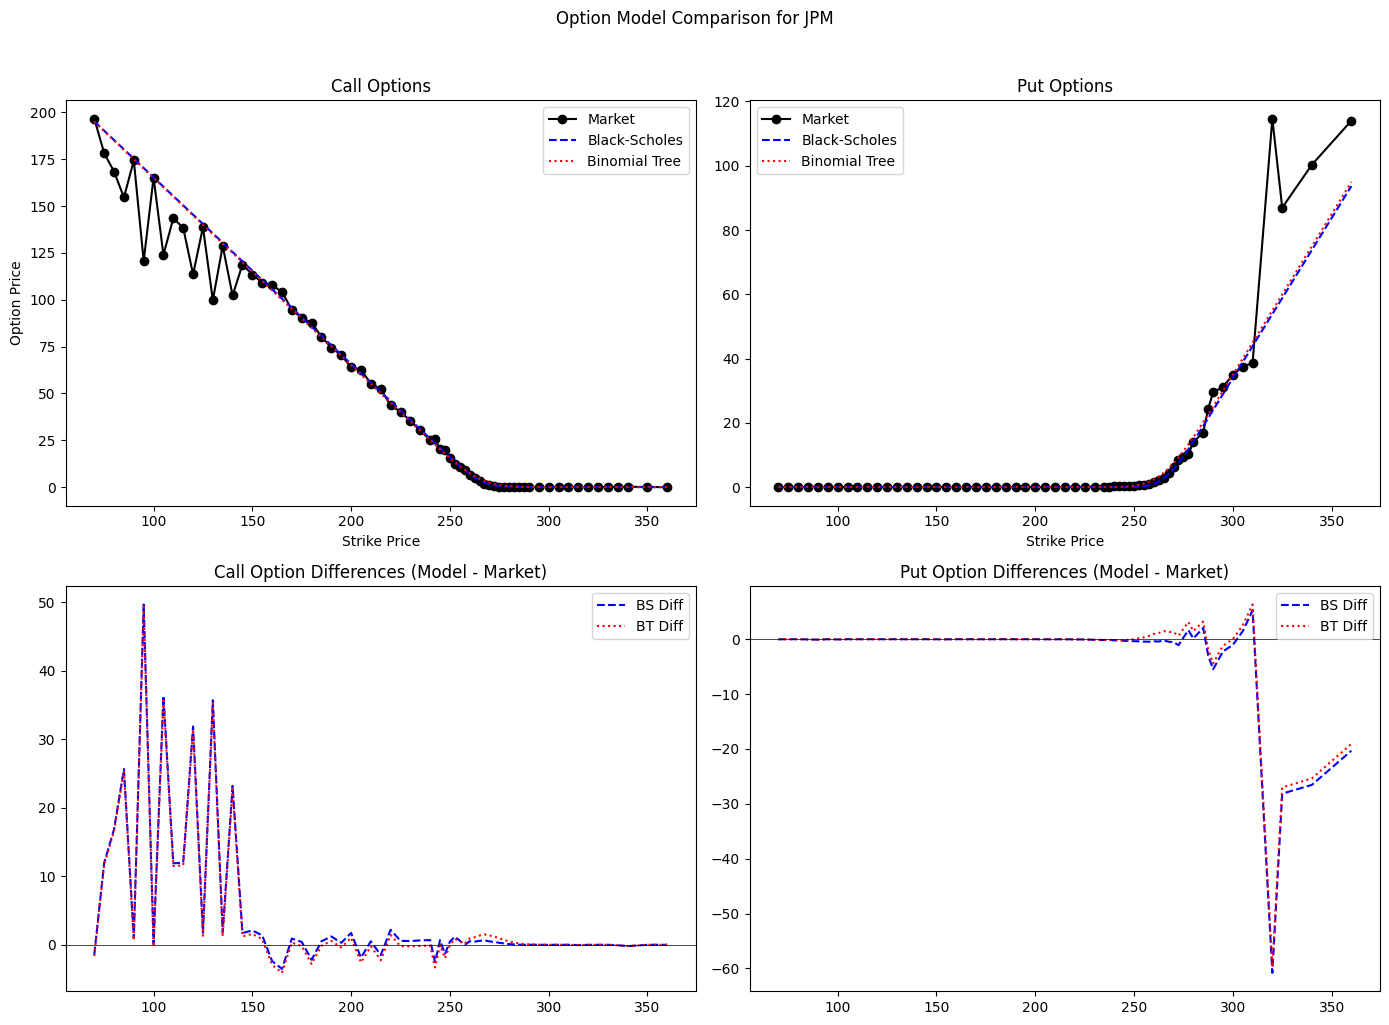


JPM Model Comparison Summary:
Mean Absolute Error vs Market Prices:
Black-Scholes: [3.56924005]
Binomial Tree: 3.5697

Correlation with Market Prices:
Black-Scholes: 0.9829954416391733
Binomial Tree: 0.9833464745303352

Number of Options Analyzed:
Calls: 67
Puts: 63


In [ ]:
if __name__ == "__main__":
    print("\nRunning comparison for JPM...")
    jpm_results = compare_models('JPM',r,steps=100)
    print_summary(jpm_results, 'JPM')


Running comparison for .HPQ..


<ipython-input-54-215469168>:55: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(risk_free_rate), float(sigma),
<ipython-input-54-215469168>:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(risk_free_rate), float(sigma),


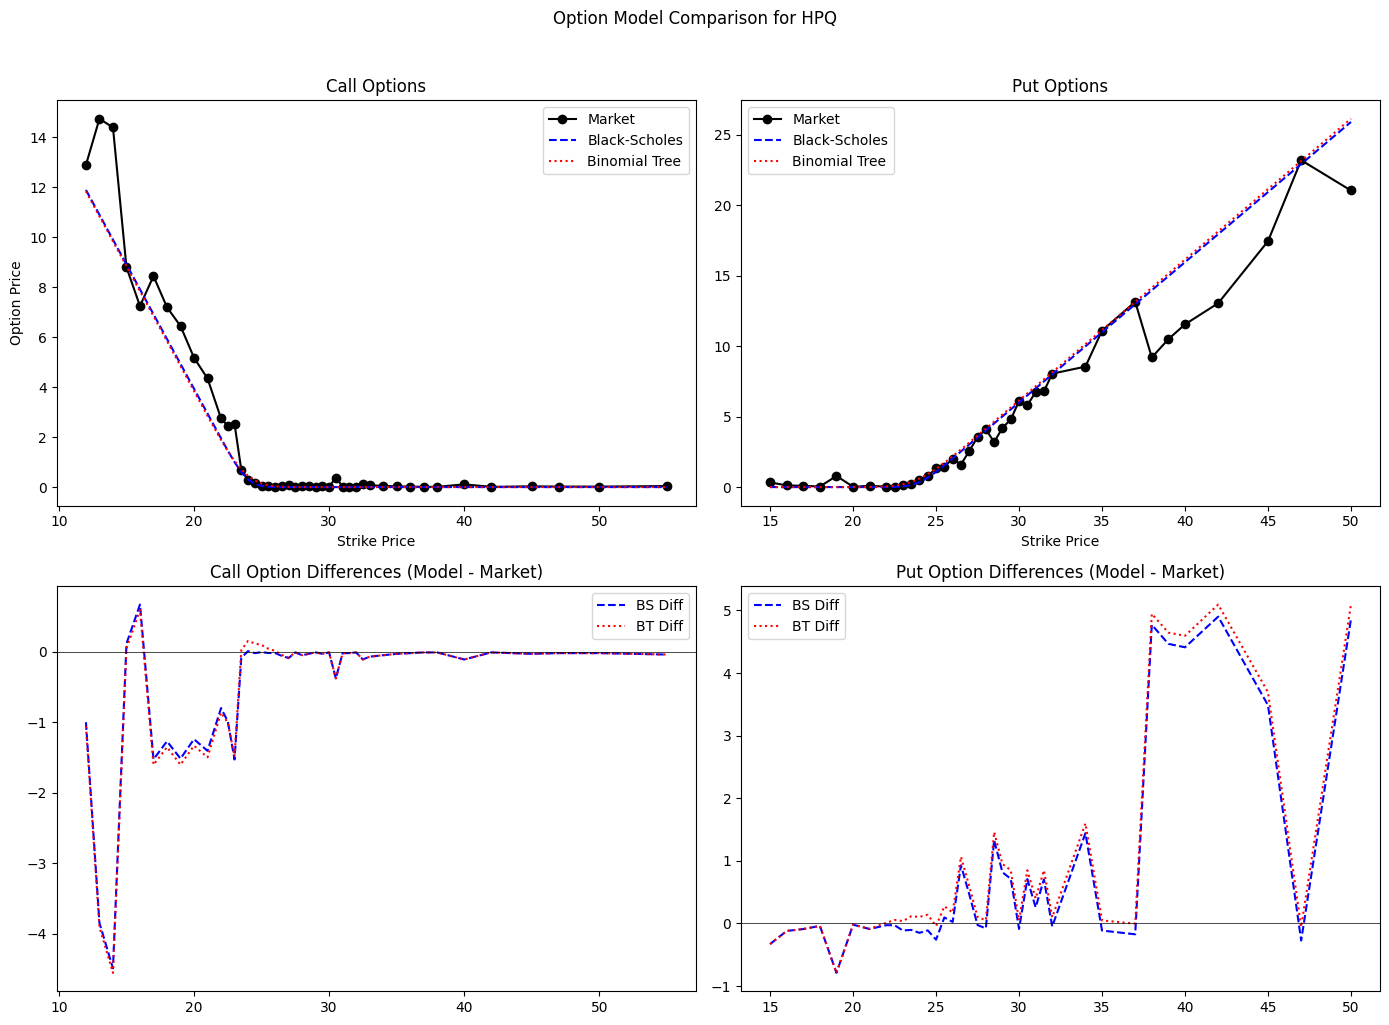


HPQ Model Comparison Summary:
Mean Absolute Error vs Market Prices:
Black-Scholes: [0.7226858]
Binomial Tree: 0.7571

Correlation with Market Prices:
Black-Scholes: 0.9700917587169
Binomial Tree: 0.9683628041636746

Number of Options Analyzed:
Calls: 44
Puts: 38


In [ ]:
if __name__ == "__main__":
    print("\nRunning comparison for .HPQ..")
    jpm_results = compare_models('HPQ',r,steps=100)
    print_summary(jpm_results, 'HPQ')


Running comparison for TSL...


<ipython-input-54-215469168>:55: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(risk_free_rate), float(sigma),
<ipython-input-54-215469168>:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(risk_free_rate), float(sigma),


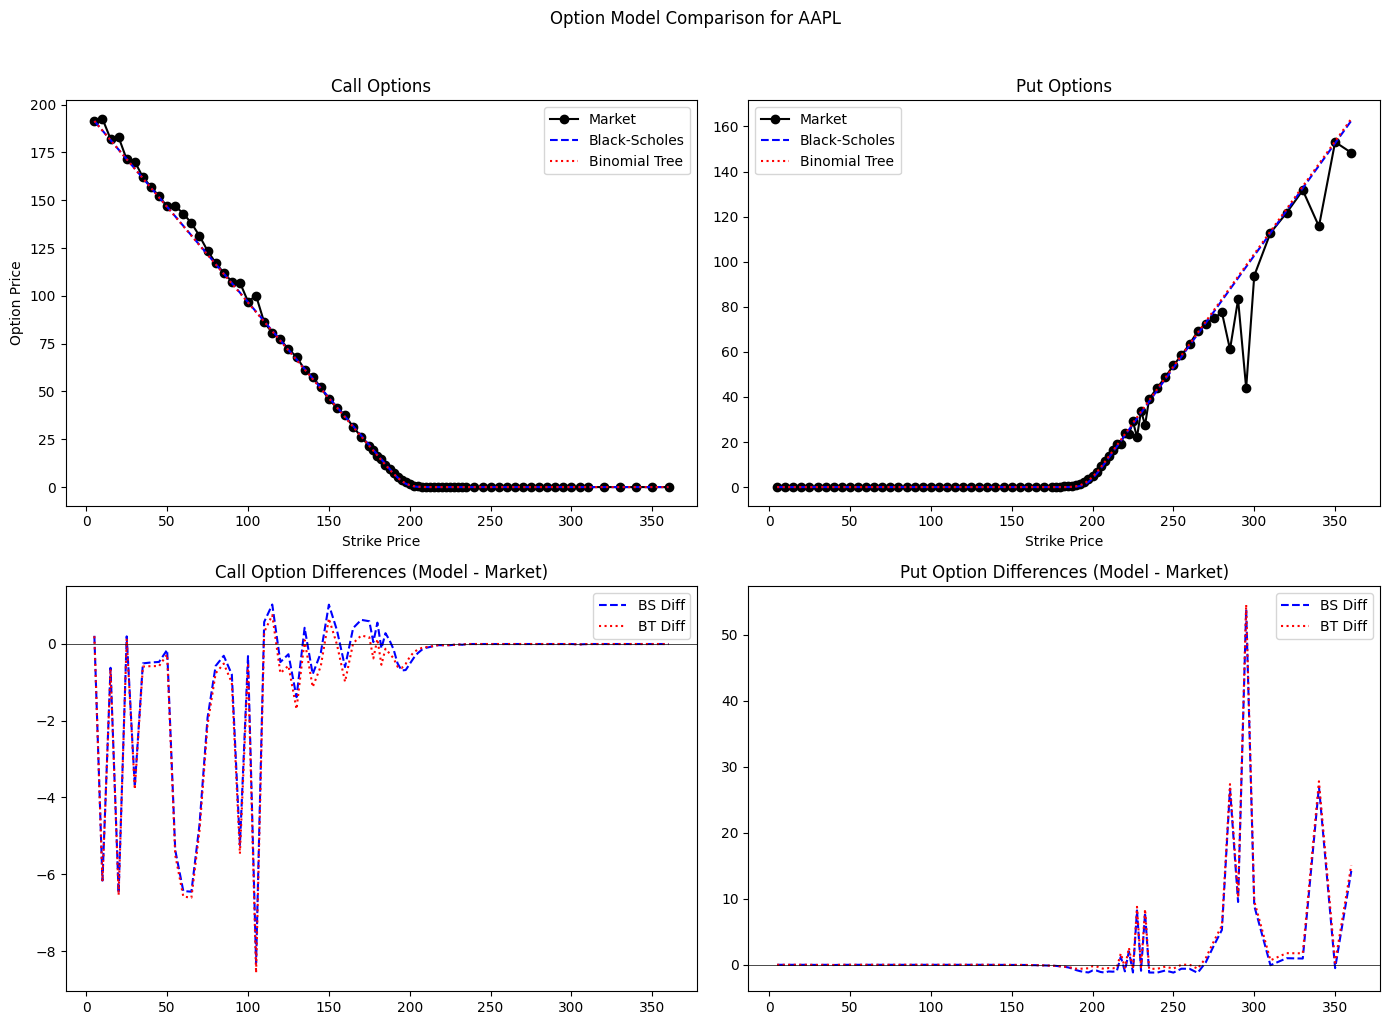


AAPL Model Comparison Summary:
Mean Absolute Error vs Market Prices:
Black-Scholes: [1.70362354]
Binomial Tree: 1.7079

Correlation with Market Prices:
Black-Scholes: 0.9943683833035677
Binomial Tree: 0.9941226687375893

Number of Options Analyzed:
Calls: 79
Puts: 78


In [ ]:
if __name__ == "__main__":
    print("\nRunning comparison for AAPL...")
    jpm_results = compare_models('AAPL',r,steps=100)
    print_summary(jpm_results, 'AAPL')

#  Option Pricing: Black-Scholes vs Binomial Tree vs Market

Comparison of **Black-Scholes (BS)** and **Binomial Tree (BT)** models vs **market prices** for options on three stocks: **JPM**, **HPQ**, and another unnamed stock.

---

##  JPM

- **Call Options**: BS & BT closely match each other but **underprice** low-strike calls vs market (possible volatility smile).
- **Put Options**: Market prices exceed model values at **high strikes**, indicating **volatility skew**.
- **Diffs**: Call and put differences increase as we move ITM/OTM.

---

##  HPQ

- **Call Options**: Market calls exceed models at **low strikes**; BS and BT nearly identical.
- **Put Options**: Market > model for most strikes.
- **Diffs**: Consistent underpricing by both models for puts, slight model divergence at some strikes.

---

## AAPL

- **Calls**: BS & BT almost perfectly match market across strikes.
- **Puts**: Market prices spike at high strikes, **model underestimates** by large margins.
- **Diffs**: Large positive difference in put prices at high strikes.

---

##  Key Takeaways

- **BS ≈ BT** across all stocks.
- Models **underprice puts at high strikes** due to ignored volatility skew.
- **BT handles edge cases slightly better**.
- Market behaviors like **smile/skew** aren't captured by constant-volatility models.

